# Dimension Reduction - TSNE and MDS
## Summary: 
TSNE is works better than MDS on this dataset.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

Dimensionality reduction on the full 60,000 images takes a very long time. Thus, I use a random subset of 10,000 images.

In [2]:
import time
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

First, I use t-SNE to reduce dimensionality down to 2D:

In [4]:
from sklearn.manifold import TSNE
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
t1 = time.time()
print("TSNE took {:.1f}s (on 10,000 MNIST images).".format(t1 - t0))

TSNE took 444.8s (on 10,000 MNIST images).


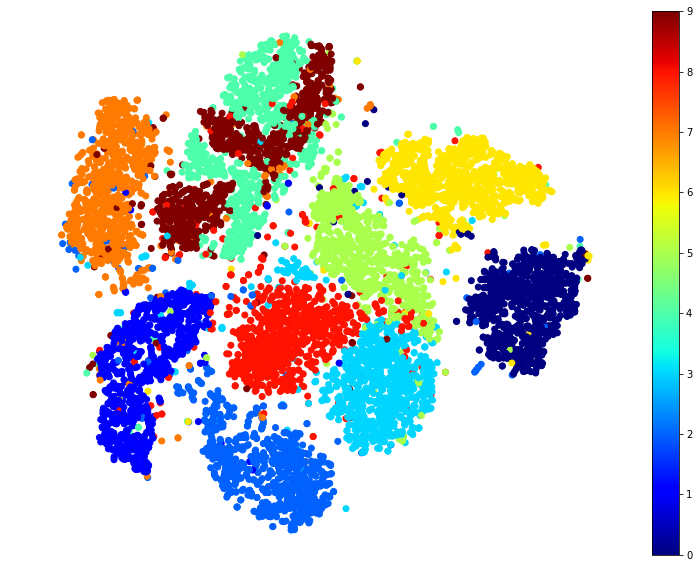

In [5]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

This plot shows which numbers are easily distinguishable from the others (e.g., 0s, 6s, and most 8s are rather well separated clusters), and it shows which numbers are hard to distinguish (e.g., 4s and 9s, 5s and 3s, and so on).
Let's focus on digits 3 and 5, which seem to overlap a lot.

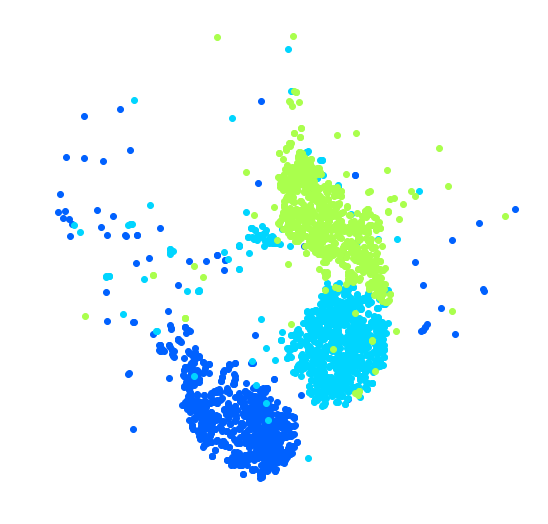

In [6]:
plt.figure(figsize=(9,9))
cmap = matplotlib.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y == digit, 0], X_reduced[y == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Thus, I run t-SNE on these 3 digits:

In [14]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

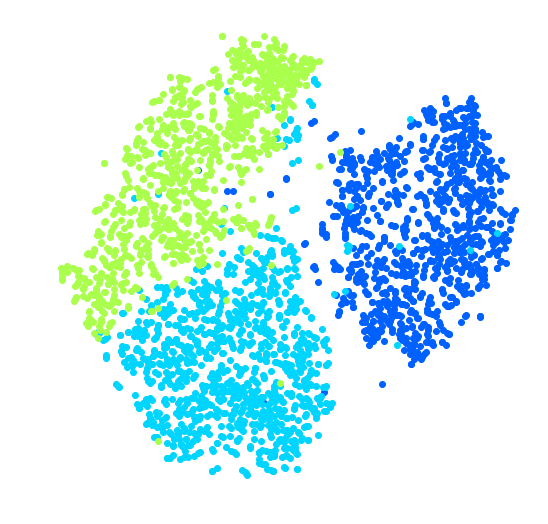

In [15]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=cmap(digit / 9))
plt.axis('off')
plt.show()

Now the clusters have far less overlap. But it is still not perfect.

Let's try MDS. It's much too long if we run it on 10,000 instances, so let's just try 2,000 for now:

MDS took 129.8s (on just 2,000 MNIST images instead of 10,000).


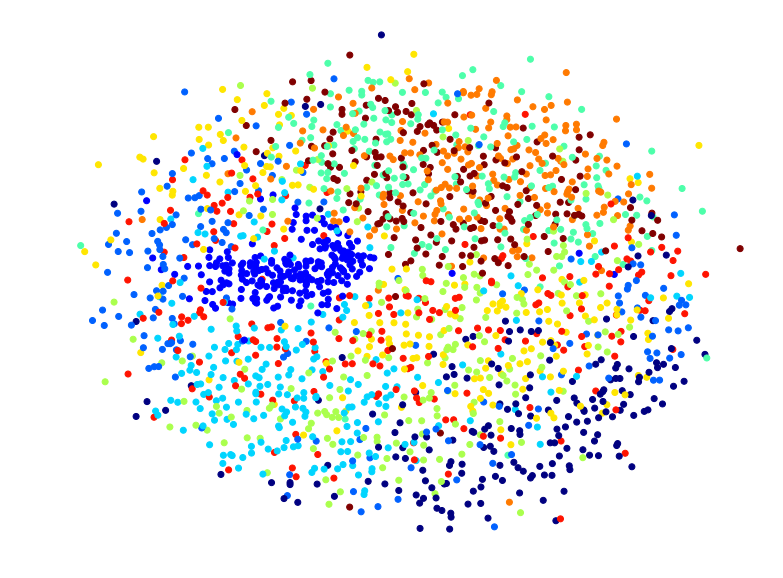

In [29]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_mds_reduced[:, 0],X_mds_reduced[:, 1], c=y[:m], cmap="jet")
plt.axis('off')
plt.show()

The clusters overlap a lot. So I try MDS after applying PCA first.

PCA+MDS took 130.9s (on 2,000 MNIST images).


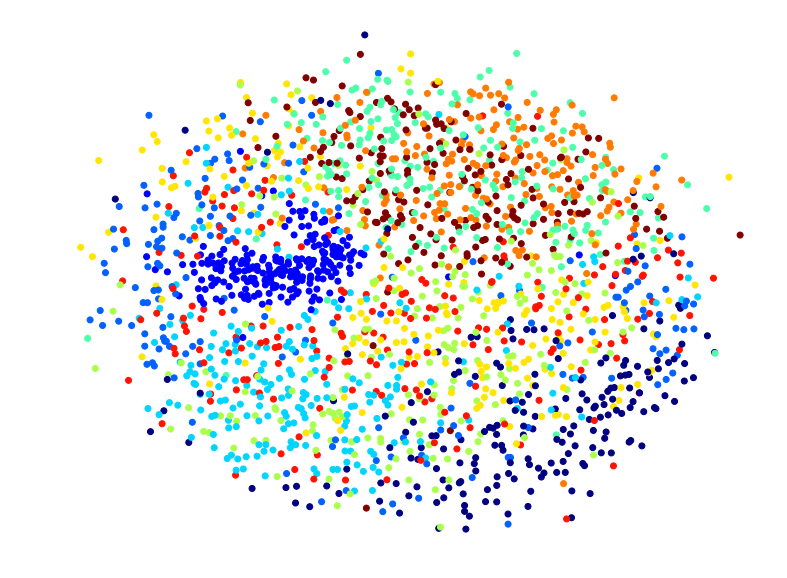

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_pca_mds_reduced[:, 0],X_pca_mds_reduced[:, 1], c=y[:m], cmap="jet")
plt.axis('off')
plt.show()

Not much of an improvement. TSNE works better.